# Exercício Prático: Classificação de Vinhos - KNN com Variação de Parâmetros

## Objetivo
Neste exercício, você irá treinar e avaliar um classificador KNN (K-Nearest Neighbors) para prever a classe de vinhos com base em suas características químicas. O dataset contém informações de diferentes tipos de vinhos e está disponível no UCI Machine Learning Repository. O objetivo é explorar o desempenho do classificador com diferentes valores de ( k ) e diferentes seeds (valores de random_state) para a divisão dos dados em treino e teste.

## Instruções
Carregamento dos Dados
Carregue os dados do dataset de vinhos da UCI utilizando o código abaixo para garantir a consistência dos nomes das colunas e tipos de dados.


### Importações das bibliotecas 

In [98]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\bruno\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


### URL do dataset Wine

In [91]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

### Nome das colunas em português BR


In [92]:
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})
print("Primeiros 5 dados do dataset:")

# Visualizando os primeiros dados do dataset
print(vinhos.head())

Primeiros 5 dados do dataset:
  classe  alcool  acido_malico  cinzas  alcalinidade_de_cinzas  magnesio  \
0      1   14.23          1.71    2.43                    15.6       127   
1      1   13.20          1.78    2.14                    11.2       100   
2      1   13.16          2.36    2.67                    18.6       101   
3      1   14.37          1.95    2.50                    16.8       113   
4      1   13.24          2.59    2.87                    21.0       118   

   fenois_totais  flavanoides  fenois_nao_flavanoides  proantocianinas  \
0           2.80         3.06                    0.28             2.29   
1           2.65         2.76                    0.26             1.28   
2           2.80         3.24                    0.30             2.81   
3           3.85         3.49                    0.24             2.18   
4           2.80         2.69                    0.39             1.82   

   intensidade_de_cor  matiz  od280_od315_de_vinhos_diluidos  prolin

# Tarefas

## 1. Separação dos Dados em Treino e Teste

Divida o conjunto de dados em treino e teste, utilizando uma proporção de 70% para treino e 30% para teste.

Defina random_state=42 para garantir a replicabilidade dos resultados.

In [93]:
# Separando as variáveis dependentes e independentes
X = vinhos.drop(columns=['classe'])
y = vinhos['classe']

In [94]:
# Divisão em treino e teste (70% treino e 30% teste)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Treinamento e Avaliação do Classificador KNN

Treine um classificador KNN com ( k = 3 ) e avalie sua acurácia no conjunto de teste.

Em seguida, treine um segundo classificador KNN com ( k = 5 ) e avalie sua acurácia no conjunto de teste.

Apresente (print) o valor de accuracy_score para cada experimento e para cada modelo com ( k = 3 ) e ( k = 5 ).

Compare os resultados para identificar qual dos modelos (com ( k = 3 ) ou ( k = 5 )) apresenta melhor desempenho.

Dica: Use a biblioteca scikit-learn para implementar e avaliar o modelo, utilizando KNeighborsClassifier para o treinamento e accuracy_score para a avaliação.

In [95]:
# Função para treinar e avaliar o modelo KNN

def treinar_avaliar_knn(X_train, X_test, y_train, y_test, k):
    """
    Treina e avalia um classificador KNN.

    Parâmetros:
    - X_train, X_test: Features de treino e teste
    - y_train, y_test: Labels de treino e teste
    - k: número de vizinhos (parâmetro do modelo KNN)

    Retorna:
    - Acurácia do modelo KNN no conjunto de teste
    """
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)


# Avaliando com k = 3

accuracy_k3 = treinar_avaliar_knn(X_train, X_test, y_train, y_test, k=3)
print("Acurácia com k=3 e random_state=42:", accuracy_k3)

# Avaliando com k = 5

accuracy_k5 = treinar_avaliar_knn(X_train, X_test, y_train, y_test, k=5)
print("Acurácia com k=5 e random_state=42:", accuracy_k5)

Acurácia com k=3 e random_state=42: 0.7407407407407407
Acurácia com k=5 e random_state=42: 0.7407407407407407


## 3. Análise com Diferentes Valores de random_state

Repita o procedimento acima (divisão dos dados, treinamento e avaliação dos modelos com ( k = 3 ) e ( k = 5 )) para os seguintes valores de random_state: 17 e 24.

Para cada random_state, registre e apresente (print) a acurácia obtida com ( k = 3 ) e ( k = 5 ) e compare os resultados.

In [96]:
# Lista de random_states e valores de k para o experimento

random_states = [17, 24]
ks = [3, 5]

# Dicionário para armazenar os resultados

resultados = {'random_state': [], 'k': [], 'acuracia': []}

# Executando o experimento para diferentes random_states e valores de k

for state in random_states:
    
    # Divisão dos dados em treino e teste com a proporção 70/30

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
    for k in ks:
        
        # Calcula a acurácia do modelo para cada combinação de k e random_state

        acuracia = treinar_avaliar_knn(X_train, X_test, y_train, y_test, k)
        resultados['random_state'].append(state)
        resultados['k'].append(k)
        resultados['acuracia'].append(acuracia)
        print(f"Acurácia com k={k} e random_state={state}: {acuracia:.4f}")


Acurácia com k=3 e random_state=17: 0.6481


Acurácia com k=5 e random_state=17: 0.6667
Acurácia com k=3 e random_state=24: 0.7407
Acurácia com k=5 e random_state=24: 0.6667


## 4. Comparação Final

Ao final, faça uma análise comparativa dos três experimentos, considerando os diferentes valores de random_state e de ( k ).

Indique qual configuração de random_state e ( k ) obteve o melhor desempenho geral.

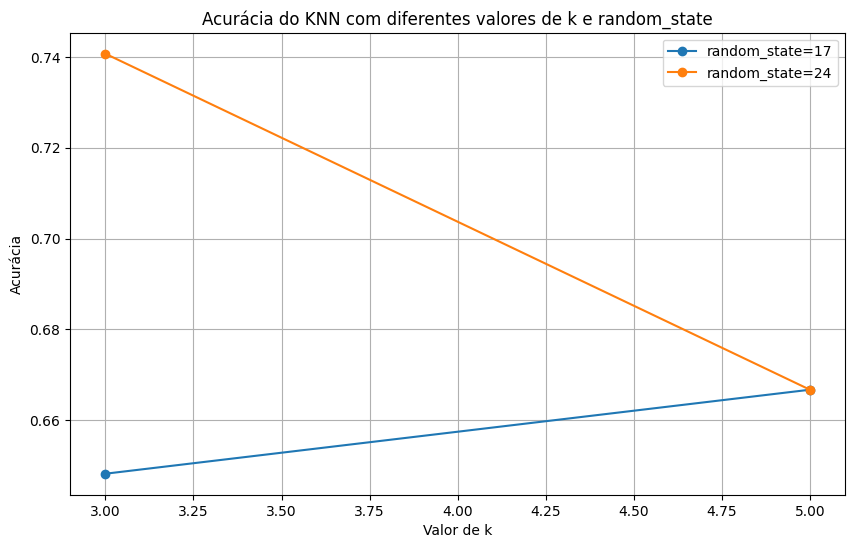


Análise Comparativa:
A melhor configuração foi com k=3.0 e random_state=24.0, obtendo uma acurácia de 0.7407.


In [97]:
import matplotlib.pyplot as plt

# Gráfico para comparar os resultados de acurácia

plt.figure(figsize=(10, 6))
for state in random_states:
    subset = df_resultados[df_resultados['random_state'] == state]
    plt.plot(subset['k'], subset['acuracia'], marker='o', label=f"random_state={state}")

plt.xlabel("Valor de k")
plt.ylabel("Acurácia")
plt.title("Acurácia do KNN com diferentes valores de k e random_state")
plt.legend()
plt.grid(True)
plt.show()

# Análise comparativa dos resultados

melhor_configuracao = df_resultados.loc[df_resultados['acuracia'].idxmax()]
print("\nAnálise Comparativa:")
print(f"A melhor configuração foi com k={melhor_configuracao['k']} e random_state={melhor_configuracao['random_state']}, "
      f"obtendo uma acurácia de {melhor_configuracao['acuracia']:.4f}.")
